In [2]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, dates
import plotly.express as px
from textblob import TextBlob
import seaborn as sns
import geopandas as gpd
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime, timedelta
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Data Cleaning

In [4]:
#Preprocess Trump Dataset for analysis
df = pd.read_csv("dataset/hashtag_donaldtrump.csv", lineterminator='\n')
df_trump = df.drop(columns=['tweet_id', 'source', 'user_screen_name', 'user_description','state_code', 'collected_at', 'user_location', 'city'])

#Removing tweets with NaN values for user_location 
df_trump = df_trump.dropna(axis='rows', thresh=10)

In [5]:
#Preprocess Biden Dataset for analysis
df = pd.read_csv("dataset/hashtag_joebiden.csv", lineterminator='\n')
df_biden = df.drop(columns=['tweet_id', 'source', 'user_screen_name', 'user_description', 'state_code', 'collected_at', 'city', 'user_location'])

#Removing tweets with NaN values for user_location 
df_biden = df_biden.dropna(axis='rows', thresh=10)

In [245]:
#Creating a test dataframe (only 5000 tweets)
test_trump = df_trump.sample(5000)
#print(test_trump.head(4))
test_biden = df_biden.sample(5000)

# Sentiment Analysis

## Trump Tweets 

In [246]:
#USING TEST DATASET
tweets_trump = [TextBlob(desc) for desc in test_trump['tweet']]

#add the sentiment metrics to the dataframe
test_trump['polarity'] = [b.polarity for b in tweets_trump]
test_trump['subjectivity'] = [b.subjectivity for b in tweets_trump]

TextBlob returns polarity and subjectivity of a sentence. Polarity lies between [-1, 1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity. TextBlob has semantic labels that help with fine-grained analysis. For example — emoticons, exclamation mark, emojis, etc. Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. It should be noted that any sentiment score between 0.05 and -0.05 is considered "Neutral".

In [247]:
test_trump.loc[test_trump.polarity > 0,'sentiment'] = 'positive'
test_trump.loc[test_trump.polarity == 0,'sentiment'] = 'neutral'
test_trump.loc[test_trump.polarity < 0,'sentiment'] = 'negative'
test_trump

,created_at,tweet,likes,retweet_count,user_id,user_name,user_join_date,user_followers_count,lat,long,country,continent,state,polarity,subjectivity,sentiment
731086,2020-11-06 00:32:39,@Mike_Pence @realDonaldTrump That’s not what t...,0.0,0.0,8.856635e+08,Gregory Harrison,2012-10-17 00:39:45,69.0,42.360253,-71.058291,United States of America,North America,Massachusetts,0.000000,0.000000,neutral
26090,2020-10-16 05:42:51,@TrumpWarRoom @Starla_Is_Awake Actually (And I...,0.0,0.0,1.541283e+07,TheUltimateTweeter,2008-07-13 07:12:44,1129.0,40.712728,-74.006015,United States of America,North America,New York,0.142857,0.317857,positive
305869,2020-10-28 16:54:35,@dbongino and @DonaldJTrumpJr guys create an #...,0.0,0.0,3.374027e+07,Latina2020,2009-04-21 00:43:44,368.0,40.789624,-73.959894,United States of America,North America,New York,0.000000,0.000000,neutral
656068,2020-11-05 00:43:41,Lies from the #Trump campaign .. https://t.co/...,2.0,0.0,4.846973e+09,Michelle Theresa,2016-01-25 21:39:22,262.0,41.875562,-87.624421,United States of America,North America,Illinois,0.000000,0.000000,neutral
781141,2020-11-06 15:12:42,@realDonaldTrump @Varneyco @FoxBusiness You ca...,1.0,0.0,9.432407e+17,Peter Joseph USMC 🌊,2017-12-19 22:04:45,2099.0,27.756767,-81.463983,United States of America,North America,Florida,-0.100000,0.400000,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504754,2020-11-03 18:28:09,@realDonaldTrump What did you pay these 200 po...,0.0,0.0,1.244364e+18,Bernd Beyss,2020-03-29 20:42:40,3.0,50.625663,7.021561,Germany,Europe,North Rhine-Westphalia,0.133333,0.533333,positive
182955,2020-10-23 03:48:55,Amen Pete! #MAGA2020 #MAGA2020LandslideVictory...,0.0,0.0,5.940572e+07,GrandpaDaddy,2009-07-23 09:00:06,35.0,39.783730,-100.445882,United States,North America,NaN,0.000000,0.000000,neutral
822642,2020-11-07 07:08:42,"ঘোষিত রাজ্যগুলির নিরিখে এখন ফল বাইডেন ২৬৪, ট্র...",24.0,1.0,8.191302e+08,Ei Samay,2012-09-12 08:29:01,107953.0,22.572672,88.363881,India,Asia,West Bengal,0.000000,0.000000,neutral
960968,2020-11-08 18:18:55,@cenkuygur It appears @JoeBiden dementia is co...,0.0,0.0,1.128476e+18,BSingSports’nStocks,2019-05-15 01:42:20,151.0,40.712728,-74.006015,United States of America,North America,New York,-0.155556,0.288889,negative


## Biden Tweets

In [71]:
test_biden['tweet'] = df_biden['tweet'].astype(str)
tweets_biden = [TextBlob(desc) for desc in test_biden['tweet']]

#add the sentiment metrics to the dataframe
test_biden['polarity'] = [b.polarity for b in tweets_biden]
test_biden['subjectivity'] = [b.subjectivity for b in tweets_biden]

In [72]:
test_biden.loc[test_biden.polarity > 0,'sentiment'] = 'positive'
test_biden.loc[test_biden.polarity == 0,'sentiment'] = 'neutral'
test_biden.loc[test_biden.polarity < 0,'sentiment'] = 'negative'
test_biden

,created_at,tweet,likes,retweet_count,user_id,user_name,user_join_date,user_followers_count,lat,long,country,continent,state,polarity,subjectivity,sentiment
240224,2020-10-30 02:45:44,"Fakebook is at it again, not to mention they a...",0.0,0.0,2.229123e+09,Zerrick Henderson,2013-12-16 20:48:44,5986.0,27.770380,-82.669508,United States of America,North America,Florida,0.171875,0.4375,positive
422550,2020-11-04 17:19:03,#JoeBiden should address the nation and claim ...,0.0,0.0,2.765017e+09,Rossy B,2014-08-25 02:45:26,749.0,25.792920,-80.135301,United States of America,North America,Florida,0.125000,1.0000,positive
78004,2020-10-21 00:49:05,@RealBankReform @realDonaldTrump @DanKEberhart...,0.0,0.0,1.985247e+08,Crunch-Bang Bowser,2010-10-04 15:05:14,2253.0,39.739236,-104.984862,United States of America,North America,Colorado,-0.500000,0.9000,negative
102749,2020-10-22 19:50:02,Politischer Schachzug? Topmanager von #Faceboo...,14.0,9.0,3.103627e+08,Epoch Times DE,2011-06-03 16:29:00,9087.0,52.517037,13.388860,Germany,Europe,Berlin,0.000000,0.0000,neutral
693665,2020-11-07 22:35:59,Tebrikler #JoeBiden,1.0,0.0,1.320118e+18,CİHAT ARAL,2020-10-24 21:41:16,209.0,41.009633,28.965165,Turkey,Europe,Istanbul,0.000000,0.0000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333726,2020-11-03 15:54:52,.@uupinfo @uupbuffalo @UUPBuffaloHSC #VOTE VOT...,2.0,4.0,1.212779e+07,Philip Glick MD MBA,2008-01-11 19:33:44,2596.0,42.886717,-78.878392,United States of America,North America,New York,0.000000,0.5000,neutral
632548,2020-11-07 17:48:21,बाइडेन को बधाई #JoeBiden,0.0,0.0,1.455718e+08,Sanjay Rai,2010-05-19 08:55:03,213.0,30.616217,77.041978,India,Asia,Haryana,0.000000,0.0000,neutral
136041,2020-10-23 05:11:01,@ShannonBream @foxandfriends @FoxNews @POTUS ...,0.0,0.0,3.716810e+09,🇺🇸,2015-09-28 17:10:38,11.0,40.486217,-74.451817,United States of America,North America,New Jersey,0.000000,0.0000,neutral
241648,2020-10-30 06:11:29,Who will win America's presidential race? #rea...,1.0,0.0,1.226761e+18,Derrick kipkorir,2020-02-10 06:55:26,5043.0,-1.283253,36.817245,Kenya,Africa,Nairobi,0.800000,0.4000,positive


## World Map

In [27]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
from shapely.geometry import Point, Polygon
crs = {'init': 'EPSG:4326'}

#print(loc_biden.head(5))
tmp=pd.concat([df_biden[['lat','long']].copy(), df_trump[['lat','long']].copy()])
tmp = tmp.dropna()
geometry = [Point(xy) for xy in zip(tmp['long'],tmp['lat'])]
geo_df = gpd.GeoDataFrame(tmp, crs=crs, geometry = geometry)

/usr/local/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


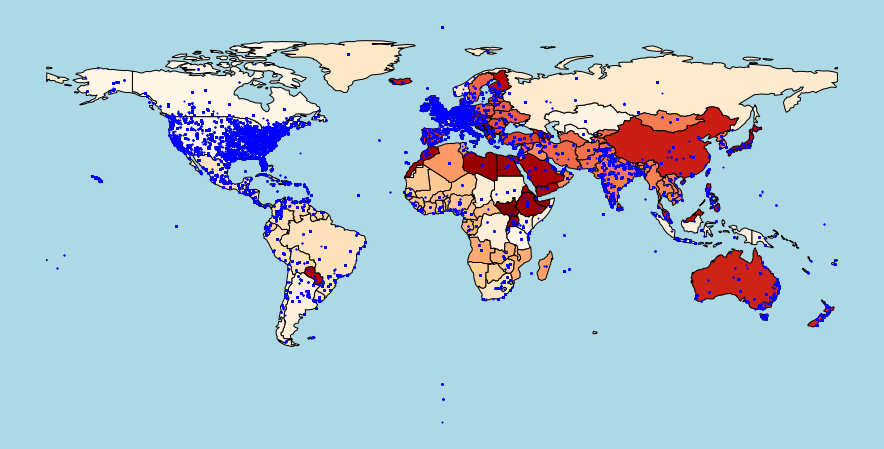

In [30]:
fig, ax = plt.subplots(1,figsize=(16,8), facecolor='lightblue')
world = world[world.name != "Antarctica"]
world.plot(ax=ax, cmap='OrRd', edgecolors='black')
geo_df.plot(ax=ax, markersize=1, color='b', marker='o')
ax.axis('off')
plt.show()

Plotting the available geo data in the dataset shows that many countries around the world are tweeting about the two presidential candidates, especially in European countries. 

We can also see points in the far East coast and Pacific region of the USA to be heavily congregated, while there is a sparse distribution in the Rocky Mountain Region and the West. 

## Sentiment Analysis
### Trump

In [250]:
fig1 = px.scatter(test_trump, x="created_at", # date on the x axis
               y="polarity", # sentiment on the y axis
               hover_data=["country", "user_name"], # data to show on hover
               color_discrete_sequence=["lightseagreen", "indianred", "mediumpurple"], # colors to use
               color="sentiment", # represent each sentiment as different color
               size="subjectivity", # the more votes, the bigger the circle
               size_max=10, # not too big (cap size)
               labels={"polarity": "Tweet positivity", "created_at": "Date Tweet was posted"}, # axis names
               title="Trump-Related Tweets Analysis", # title of figure
          )

fig1.show()

### Biden

In [249]:
#Order of key does not match fig1
fig1 = px.scatter(test_biden, x="created_at", # date on the x axis
               y="polarity", # sentiment on the y axis
               hover_data=["country", "user_name"], # data to show on hover
               color_discrete_sequence=["indianred", "lightseagreen", "mediumpurple"], # colors to use
               color="sentiment", # represent each sentiment as different color
               size="subjectivity", # the more votes, the bigger the circle
               size_max=10, # not too big (cap size)
               labels={"polarity": "Tweet positivity", "created_at": "Date Tweet was posted"}, # axis names
               title="Biden-Related Tweets Analysis", # title of figure
          )

fig1.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['created_at', 'tweet', 'likes', 'retweet_count', 'user_id', 'user_name', 'user_join_date', 'user_followers_count', 'lat', 'long', 'country', 'continent', 'state'] but received: polarity

## Word Maps
### Trump

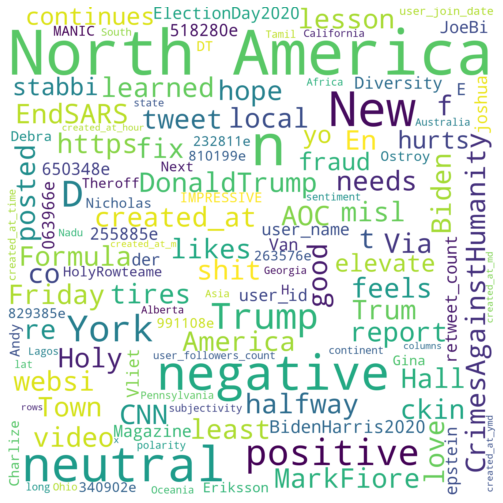

In [231]:
#Looking at all Tweets
plt.subplots(1,1, figsize=(9,9))
wc_b = WordCloud(stopwords=STOPWORDS, 
                 background_color="white", max_words=2000,
                 max_font_size=256, random_state=42,
                 width=1600, height=1600)
wc_b.generate(str(test_trump.dropna()))
plt.imshow(wc_b, interpolation="bilinear")
plt.axis('off')
plt.show()

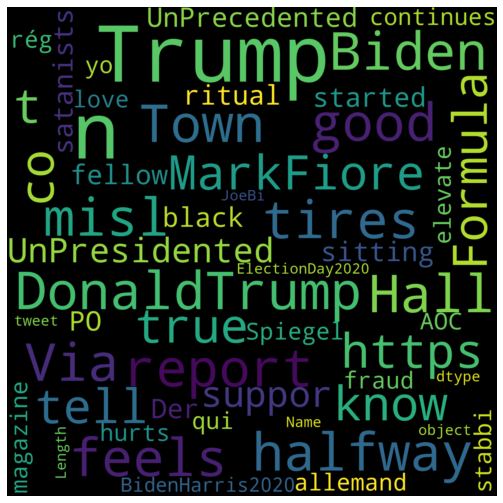

In [134]:
#Looking at just the United States 
text1 = test_trump.loc[test_trump['country'] == 'United States of America']['tweet']
plt.subplots(1,1, figsize=(9,9))
wc_t = WordCloud(stopwords=STOPWORDS, 
                 background_color="black", max_words=2000,
                 max_font_size=256, random_state=42,
                 width=1600, height=1600)
wc_t.generate(str(text1.dropna()))
plt.imshow(wc_t, interpolation="bilinear")
plt.axis('off')
plt.show()

### Biden

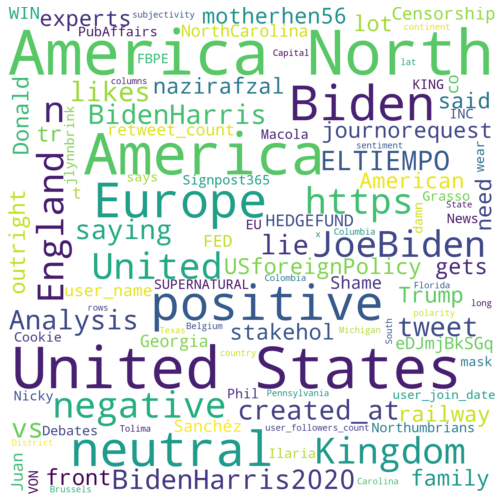

In [23]:
#Looking at all Tweets
plt.subplots(1,1, figsize=(9,9))
wc_b = WordCloud(stopwords=STOPWORDS, 
                 background_color="white", max_words=2000,
                 max_font_size=256, random_state=42,
                 width=1600, height=1600)
wc_b.generate(str(test_biden.dropna()))
plt.imshow(wc_b, interpolation="bilinear")
plt.axis('off')
plt.show()

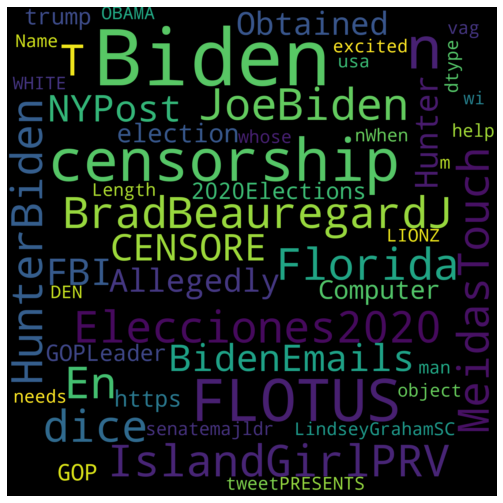

In [36]:
#Looking at just the United States 
text2 = df_biden.loc[df_biden['country'] == 'United States of America']['tweet']
plt.subplots(1,1, figsize=(9,9))
wc_t = WordCloud(stopwords=STOPWORDS, 
                 background_color="black", max_words=2000,
                 max_font_size=256, random_state=42,
                 width=1600, height=1600)
wc_t.generate(str(text2.dropna()))
plt.imshow(wc_t, interpolation="bilinear")
plt.axis('off')
plt.show()

## Mean Sentiment Score in US states over 14 days 

In [17]:
# Create 52 state set
states = set(test_trump.loc[test_trump['country'] == 'United States of America']['state'].dropna())
states.remove('District of Columbia')
#states.remove('Northern Mariana Islands')

# Create feature to allow masking of data and then mask data for votable states
test_biden['voting_rights'] = test_biden['state'].apply(lambda x: 'Yes' if x in states else 'No')
test_trump['voting_rights'] = test_trump['state'].apply(lambda x: 'Yes' if x in states else 'No')
sent_t = test_trump.loc[test_trump['voting_rights'] == 'Yes']
sent_b = test_biden.loc[test_biden['voting_rights'] == 'Yes']

# Only grab data from the last 14 days 
sent_t['created_at_time'] = pd.to_datetime(sent_t['created_at'], utc=True)
sent_b['created_at_time'] = pd.to_datetime(sent_b['created_at'], utc=True)
state_t = sent_t.loc[sent_t['created_at_time'] > max(sent_t['created_at_time']) - timedelta(14)]
state_b = sent_b.loc[sent_b['created_at_time'] > max(sent_b['created_at_time']) - timedelta(14)]

state_b_mean = state_b.groupby('state')['subjectivity'].mean().reset_index()
state_t_mean = state_t.groupby('state')['subjectivity'].mean().reset_index()

/var/folders/_y/2k4z31x5327g8s42stznn9wm0000gn/T/ipykernel_48199/1435961259.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_y/2k4z31x5327g8s42stznn9wm0000gn/T/ipykernel_48199/1435961259.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
# Further mask data for only the last 14 days 
state_bp = sent_b.loc[sent_b['created_at_time'] < min(sent_b['created_at_time']) + timedelta(14)]
state_tp = sent_t.loc[sent_t['created_at_time'] < min(sent_t['created_at_time']) + timedelta(14)]
state_bp_mean = state_bp.groupby('state')['subjectivity'].mean().reset_index()
state_tp_mean = state_tp.groupby('state')['subjectivity'].mean().reset_index()

In [19]:
states_sent = pd.DataFrame({'state':state_b_mean['state'],
                          'biden1':state_b_mean['subjectivity'],
                          'trump1':state_t_mean['subjectivity'],
                          'biden2':state_bp_mean['subjectivity'],
                          'trump2':state_tp_mean['subjectivity'],})

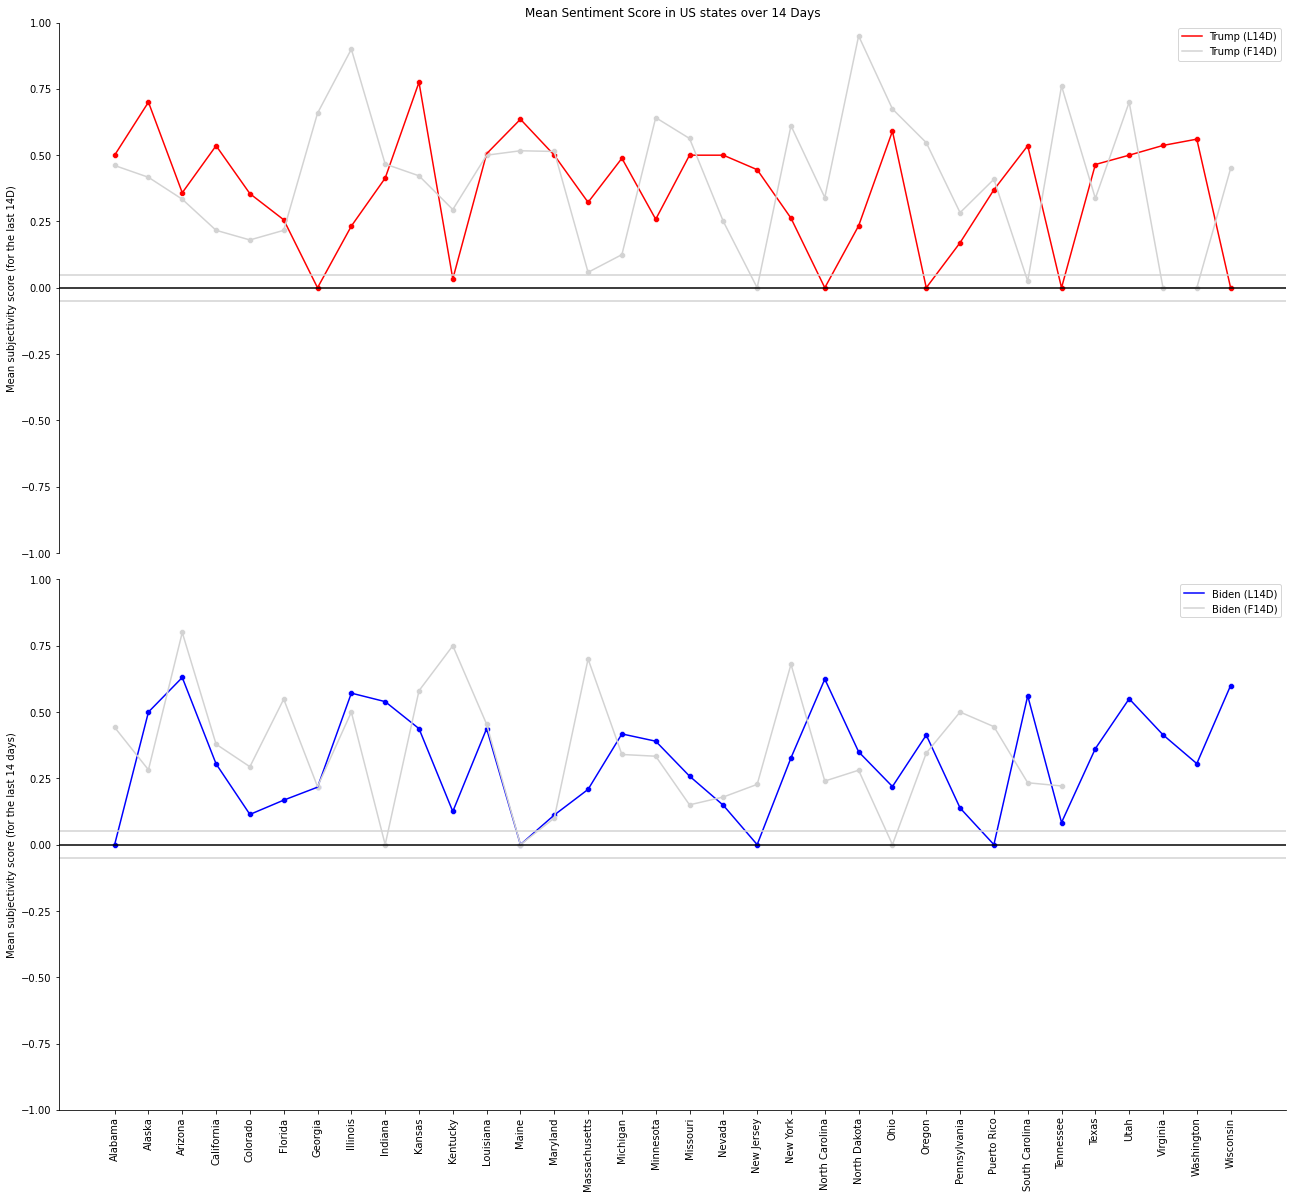

In [241]:
fig, ax = plt.subplots(2,1, figsize = (22,20), gridspec_kw = {'hspace':0.05})

lineax = ax[0]
sns.lineplot(x='state', y='trump1', color='red', data=states_sent, ax=lineax, label='Trump (L14D)').set_title('Mean Sentiment Score in US states over 14 Days')
sns.scatterplot(x='state', y='trump1', color='red', data=states_sent, ax=lineax)
sns.lineplot(x='state', y='trump2', color='lightgrey', data=states_sent, ax=lineax, label='Trump (F14D)')
sns.scatterplot(x='state', y='trump2', color='lightgrey', data=states_sent, ax=lineax)
lineax.set_ylim([-1, 1])
lineax.set_ylabel('Mean subjectivity score (for the last 14D)')
lineax.set_xlabel('')
plt.xticks(rotation=90)
lineax.axhline(y=0, color='k', linestyle='-')
lineax.axhline(y=0.05, color='lightgrey', linestyle='-')
lineax.axhline(y=-0.05, color='lightgrey', linestyle='-')
lineax.axes.get_xaxis().set_ticks([])
lineax.spines['right'].set_visible(False)
lineax.spines['top'].set_visible(False)
lineax.spines['bottom'].set_visible(False)

lineax=ax[1]
sns.lineplot(x='state', y='biden1', color='blue', data = states_sent, ax = lineax, label ='Biden (L14D)')
sns.scatterplot(x='state', y='biden1', color='blue', data=states_sent, ax=lineax)
sns.lineplot(x='state', y = 'biden2', color = 'lightgrey', data = states_sent, ax = lineax, label = 'Biden (F14D)')
sns.scatterplot(x='state', y='biden2', color='lightgrey', data=states_sent, ax=lineax)
lineax.set_ylim([-1, 1])
lineax.set_ylabel('Mean subjectivity score (for the last 14 days)')
lineax.set_xlabel('')
plt.xticks(rotation=90)
lineax.axhline(y = 0, color ='k', linestyle = '-')
lineax.axhline(y = 0.05, color ='lightgrey', linestyle = '-')
lineax.axhline(y = -0.05, color='lightgrey', linestyle = '-')
lineax.spines['right'].set_visible(False)
lineax.spines['top'].set_visible(False)
plt.show()

## Average Polarity over Time

In [122]:
#For datetime graph purposes
test_trump['created_at_time'] = pd.to_datetime(test_trump['created_at'], utc=True)
test_trump['created_at_md'] = test_trump['created_at_time'].dt.strftime('%m-%d')

test_biden['created_at_time'] = pd.to_datetime(test_biden['created_at'], utc=True)
test_biden['created_at_md'] = test_biden['created_at_time'].dt.strftime('%m-%d')

#test_trump.groupby(['created_at_hour', 'sentiment'], as_index=False)
trump_groupby_date_mean = test_trump.groupby(['created_at_md', 'polarity'], as_index=False).mean()
biden_groupby_date_mean = test_biden.groupby(['created_at_md', 'polarity'], as_index=False).mean()
#biden_groupby_date_mean = test_biden.groupby('created_at')['polarity'].mean()

#Create new dataframe datewise_polarity
datewise_polarity = pd.DataFrame(columns=["Date", "Trump Polarity", "Biden Polarity"])
dates = trump_groupby_date_mean.created_at_md

datewise_polarity["Date"] = dates
datewise_polarity["Trump Polarity"] = trump_groupby_date_mean.polarity
datewise_polarity["Biden Polarity"] = biden_groupby_date_mean.polarity

datewise_polarity.set_index("Date", inplace=True)

<AxesSubplot:title={'center':'Average Polarity over Time'}, xlabel='Time', ylabel='Average Polarity'>

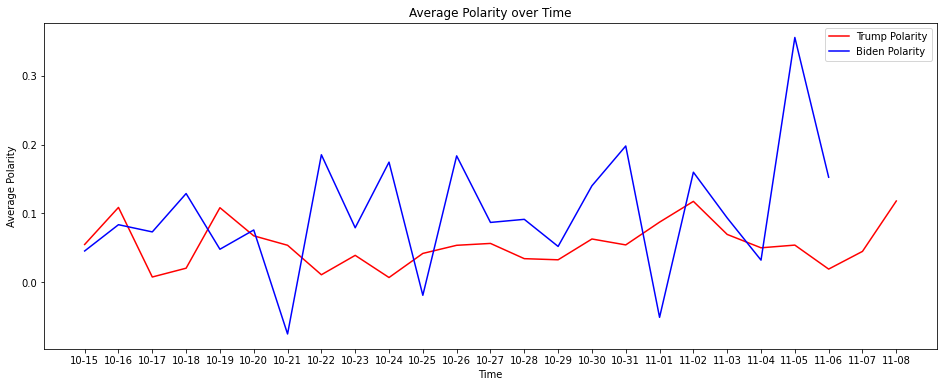

In [133]:
plt.figure(figsize=(16,6))

plt.title("Average Polarity over Time")
plt.xlabel("Time")
plt.ylabel("Average Polarity")

sns.lineplot(data=datewise_polarity, ci=None, palette=['r', 'b'], dashes=False)

## Tweet Counts Over Time 

In [226]:
#Trend tweets per day
#Setting datetime values

test_trump['created_at_time'] = pd.to_datetime(test_trump['created_at'], utc=True)
test_trump['created_at_ymd'] = test_trump['created_at_time'].dt.strftime('%Y-%m-%d')

test_biden['created_at_time'] = pd.to_datetime(test_biden['created_at'], utc=True)
test_biden['created_at_ymd'] = test_biden['created_at_time'].dt.strftime('%Y-%m-%d')


#Setting x values 
trump_y = test_trump.groupby(['created_at_ymd', 'sentiment'], as_index=False).count().sort_index()
biden_y = test_biden.groupby(['created_at_ymd', 'sentiment'], as_index=False).count().sort_index()

datewise_tweets = pd.DataFrame(columns=["Date", "Trump Tweets", "Biden Tweets"])
dates = trump_y.created_at_ymd

In [228]:
datewise_tweets["Date"] = dates
datewise_tweets["Trump Tweets"] = trump_y.created_at
datewise_tweets["Biden Tweets"] = biden_y.created_at
datewise_tweets.set_index("Date",inplace=True)

In [251]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='Trump', x=dates, y=datewise_tweets["Trump Tweets"]), 
    go.Bar(name='Biden', x=dates, y=datewise_tweets["Biden Tweets"])
])

fig.update_layout(title_text='Weekdays Tweets Joe Biden vs Donald Trump')
fig.update_xaxes(title='Weekdays')
fig.update_yaxes(title='Count of Tweets')

fig.show()

## Pie Chart of Demographic
### Trump

In [126]:
def make_dictionary(dataframe,column):
    dictt = {}
    for i in list(dataframe[column]):
        if i in dictt:
            dictt[i] = dictt.get(i) + 1
        else:
            dictt[i] = 1
    return dictt

In [127]:
country_trump = make_dictionary(test_trump,'country')
state_trump = make_dictionary(test_trump,'state')
continent_trump = make_dictionary(test_trump,'continent')
continent_trump

{'South America': 207,
 'North America': 2713,
 'Asia': 500,
 'Europe': 1324,
 'Africa': 101,
 nan: 36,
 'Oceania': 119}

In [128]:
labelsT = ['North America', 'Europe', 'Asia', 'Africa']
valuesT = ['51', '27','18', '2']

In [129]:
#Does not look cute... pie chart with matplotlib
#figT = plt.pie(valuesT, labels=labelsT, autopct='%1.1f%%', radius=2)
#plt.show()
figT = px.pie(names=labelsT, values=valuesT, title='Tweet Demographic by Continent')
figT.show()